In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [2]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [3]:
import numpy
uvinitial = numpy.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

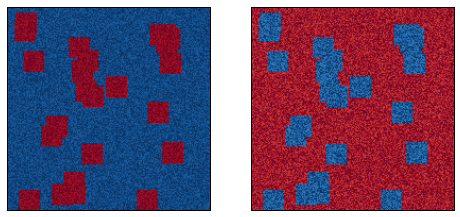

In [4]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [5]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [6]:
def ftcs(u, v, nt, Du, Dv, F, k, dt, dx, dy):
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + Du *\
            (dt/dy**2 * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1]) +\
             dt/dx**2 * (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2])) -\
             dt * un[1:-1,1:-1] * vn[1:-1,1:-1]**2 + dt * F * (1 - un[1:-1,1:-1] )
        v[1:-1,1:-1] = vn[1:-1,1:-1] + Dv *\
            (dt/dy**2 * (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1]) +\
             dt/dx**2 * (vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2])) +\
             dt * un[1:-1,1:-1] * vn[1:-1,1:-1]**2 - dt * (F + k) * vn[1:-1,1:-1]
        
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:,-2]
        u[1,:] = u[2,:]
        u[:,1] = u[:,2]
        v[-1,:] = v[-2,:]
        v[:,-1] = v[:,-2]
        v[1,:] = v[2,:]
        v[:,1] = v[:,2]
        
        return u,v

In [7]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [8]:
dt = .9 * dh**2 / (4*max(Du,Dv))
U = ftcs(u.copy(), v, nt, Du, Dv, F, k, dt, dx, dy)

NameError: name 'u' is not defined